# 簡單線性迴歸範例

In [1]:
# -*- coding: utf-8 -*-
"""
Created on Sun Mar 20 20:08:52 2022

@author: glanb
"""
filename='data_weight.txt'

# 1. txt reader
with open(filename,'r') as f:
    for line in f.readlines():
        print(line)

UnicodeDecodeError: 'cp950' codec can't decode byte 0xe7 in position 11: illegal multibyte sequence

上面有error 「'cp950' codec can't decode byte 0xe7 in position 11: illegal multibyte sequence」<br>
因為文字檔內有中文，所以要給解碼指令。


In [2]:
# 2. 因為有中文需要解碼
with open(filename,'r', encoding="utf-8") as f:
    for line in f.readlines():
        print(line)

171.2	56.6	男

158.5	50	女

173	62	男

178	66	男

179	70	男

158	54	女

170	62	男

180	30	男

171	60	男

174	54	男

168	58	男

182	103	男

177	83	男

170	65	男

158.5	50	女

158	54	女

162	58	女

167	60	女

154	40	女

160	55	女

152	45	女

180	90	男

175	80	男

185	101	男



因為資料有男有女<br>
我們可以將男生的資料類別給定為1<br>
女生的資料類別給定為0<br>

In [3]:
data_heigh=[]
data_weight=[]
label=[]
with open(filename,'r', encoding="utf-8") as f:
    for line in f.readlines():
        line = line.split('\t')
        data_heigh.append(float(line[0]))
        data_weight.append(float(line[1]))
        if '男' in line[2]:
            label.append(1)
        else:
            label.append(0)


利用相關係數看一下身高和體重有沒有關聯性
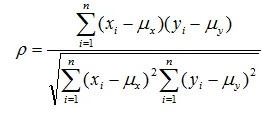

[[1.         0.66455488]
 [0.66455488 1.        ]]
0.6645548839012572


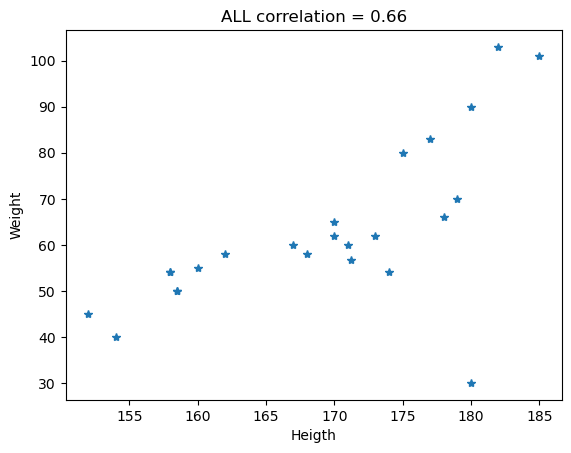

In [4]:
# 1. correlation
import numpy as np
import matplotlib.pyplot as plt
data_heigh = np.array(data_heigh)
data_weight = np.array(data_weight)
covmatrix = np.corrcoef(data_heigh, data_weight)

print(covmatrix)

cov = np.sum((data_heigh-np.mean(data_heigh))*(data_weight-np.mean(data_weight)))
r = cov/((np.sum((data_heigh-np.mean(data_heigh))**2)*np.sum((data_weight-np.mean(data_weight))**2))**0.5)
print(r)

plt.figure()
plt.plot(data_heigh, data_weight,'*')
plt.xlabel('Heigth')
plt.ylabel('Weight')
plt.title('ALL correlation = {:.2f}'.format(r))
plt.show()


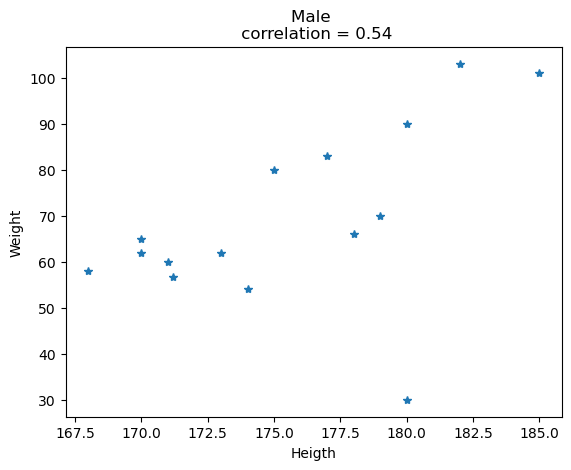

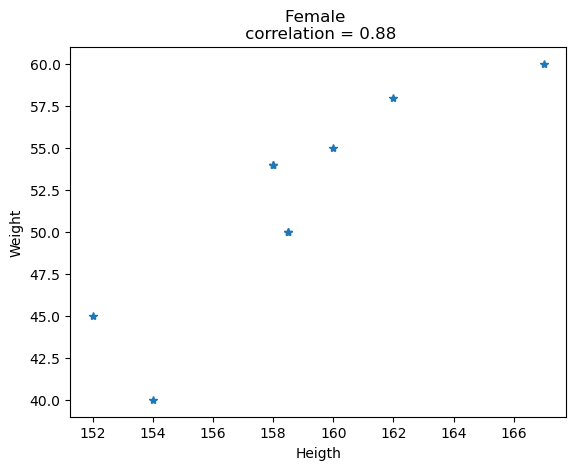

In [5]:
# 2. correlation (Male and Female)
label=np.array(label)
pos_male = np.where(label==1)[0]
pos_female = np.where(label==0)[0]
plt.figure()
r_male = np.corrcoef(data_heigh[pos_male],data_weight[pos_male])
plt.plot(data_heigh[pos_male], data_weight[pos_male],'*')
plt.xlabel('Heigth')
plt.ylabel('Weight')
plt.title('Male \n correlation = {:.2f}'.format(r_male[0][1]))
plt.show()
plt.figure()
r_female = np.corrcoef(data_heigh[pos_female],data_weight[pos_female])
plt.plot(data_heigh[pos_female], data_weight[pos_female],'*')
plt.xlabel('Heigth')
plt.ylabel('Weight')
plt.title('Female \n correlation = {:.2f}'.format(r_female[0][1]))
plt.show()

# 簡單線性回歸

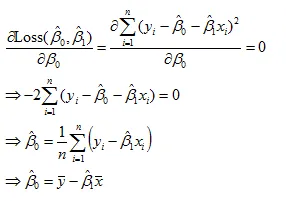
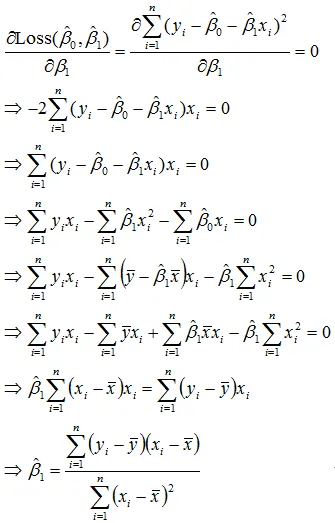

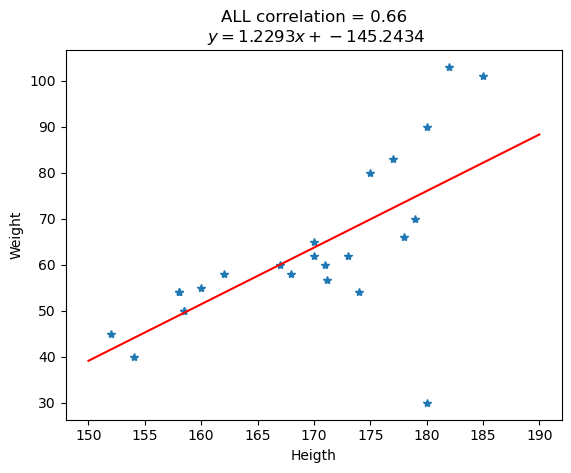

In [6]:
# Linear regression
x = data_heigh
y = data_weight
x_bar=np.mean(x)
y_bar=np.mean(y)
b1 = np.sum((y-y_bar)*(x-x_bar))/np.sum((x-x_bar)**2)
b0 = y_bar-b1*x_bar

r = np.corrcoef(data_heigh, data_weight)
x_star = np.linspace(150,190,100)
y_hat = x_star*b1+b0
plt.figure()
plt.plot(x, y,'*')
plt.plot(x_star, y_hat,'r-')
plt.xlabel('Heigth')
plt.ylabel('Weight')
plt.title('ALL correlation = {:.2f}\n $y={:.4f}x+{:.4f}$'.format(r[0][1],b1,b0))
plt.show()

## 女生資料的迴歸模型

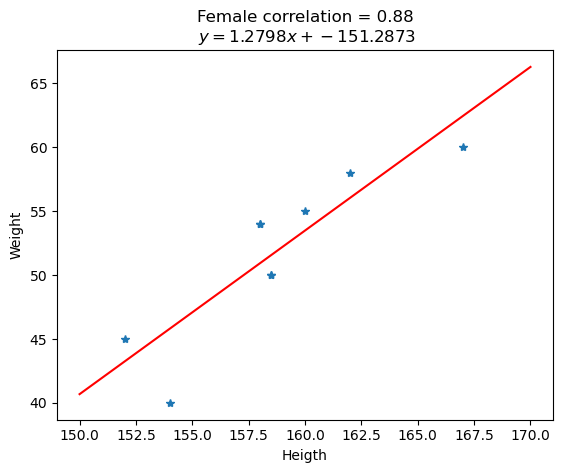

In [7]:
# Linear regression (female)
label=np.array(label)
pos_female = np.where(label==0)[0]
x = data_heigh[pos_female]
y = data_weight[pos_female]
x_bar=np.mean(x)
y_bar=np.mean(y)
b1 = np.sum((y-y_bar)*(x-x_bar))/np.sum((x-x_bar)**2)
b0 = y_bar-b1*x_bar

x_star = np.linspace(150,170,100)
y_hat = x_star*b1+b0
plt.figure()
plt.plot(x, y,'*')
plt.plot(x_star, y_hat,'r-')
plt.xlabel('Heigth')
plt.ylabel('Weight')
plt.title('Female correlation = {:.2f}\n $y={:.4f}x+{:.4f}$'.format(r_female[0][1],b1,b0))

plt.show()

## 男生資料的迴歸模型

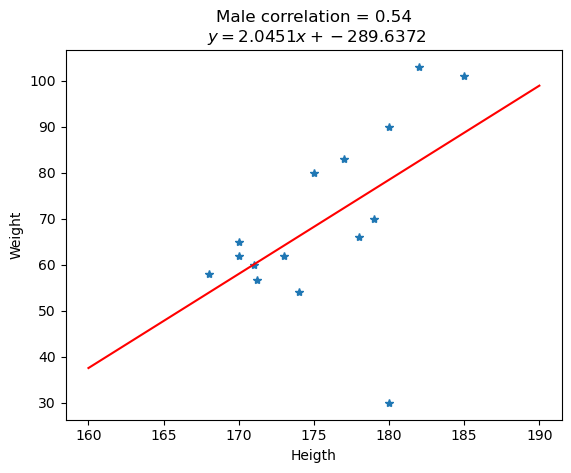

In [8]:
# Linear regression (male)
pos_male = np.where(label==1)[0]
x = data_heigh[pos_male]
y = data_weight[pos_male]
x_bar=np.mean(x)
y_bar=np.mean(y)
b1 = np.sum((y-y_bar)*(x-x_bar))/np.sum((x-x_bar)**2)
b0 = y_bar-b1*x_bar

x_star = np.linspace(160,190,100)
y_hat = x_star*b1+b0
plt.figure()
plt.plot(x, y,'*')
plt.plot(x_star, y_hat,'r-')
plt.xlabel('Heigth')
plt.ylabel('Weight')
plt.title('Male correlation = {:.2f}\n $y={:.4f}x+{:.4f}$'.format(r_male[0][1],b1,b0))

plt.show()



# Sklearn module 操作

In [9]:

from sklearn.linear_model import LinearRegression
x = np.expand_dims(data_heigh,1)
y = np.expand_dims(data_weight,1)

LR = LinearRegression()
LR.fit(x,y)
print('coefficient by sklearn')
print(LR.coef_)
print(LR.intercept_)


x_bar=np.mean(x)
y_bar=np.mean(y)
b1 = np.sum((y-y_bar)*(x-x_bar))/np.sum((x-x_bar)**2)
b0 = y_bar-b1*x_bar
print('coefficient by close form')
print(b1)
print(b0)


coefficient by sklearn
[[1.22930225]]
[-145.24342918]
coefficient by close form
1.2293022506413256
-145.2434291793563
